#Comparación entre clusters

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive/')
drive_path = '/content/gdrive/Shareddrives/TAE/archivos/'

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv(drive_path + 'categoricas_try1.csv')
df.rename({'Clusters': 'cluster'}, axis=1, inplace=True)

En el siguiente gráfico se muestran las diferencias con respecto a las carreras (11: Computación, 15: Ingeniería y tecnología, 14: Ingeniería, 27: Matemáticas)  brindadas por modalidad (0: No se oferta, 1: Presencial, 2: Virtual) para cada tipo de universidad obtenido con lo realizado previamente.  
- Una similaridad en los grupos de universidades 0, 2 y 5 dado que la mayoría de las universidades que los conforman no brindan ninguno de los 4 tipos de campos.
- Notamos una similaridad en los grupos 3 y 4 dado que tienen aproximadamente 300 universidades que no ofertan pregrado de inegeniería e ingeniería y tecnología.
- Una gran mayoría de las universidades que brindan las diferentes carreras en la modalidad virtual se encuentran en el grupo 3.
- La gran mayoría de universidades que ofrecen computación e ingeniería y tecnología de forma presencial se encuentran en el cluster 1
- En el cluster 4 es el grupo en donde se encuentran ofertadas todas las carreras de interés en modalidad presencial.

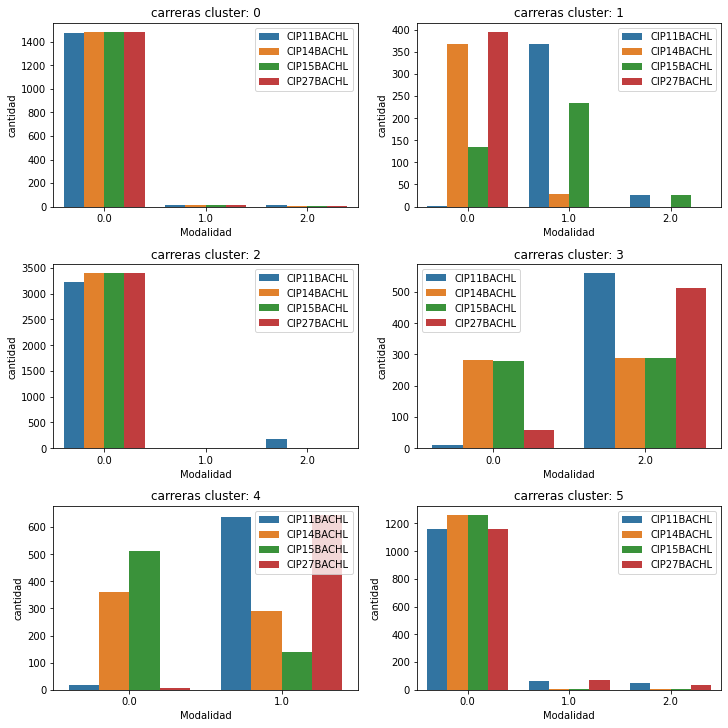

In [ ]:
cols_to_graph = ['CIP11BACHL', 'CIP14BACHL', 'CIP15BACHL', 'CIP27BACHL']
nrow = 3; ncol = 2;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10, 10), constrained_layout = True)

for ax, cluster in zip(axs.reshape(-1), range(6)): 
  datos = {'tipo': [], 'carrera': [], 'cantidad': []}
  df_clust = df[df['cluster'] == cluster]
  # TODO: Nombre de gráfica y labels
  for col in cols_to_graph:
      for key, value in df_clust[col].value_counts().to_dict().items():
          datos['tipo'].append(key)
          datos['carrera'].append(col)
          datos['cantidad'].append(value)

  sns.barplot(data=datos,
              x='tipo',
              y='cantidad',
              hue='carrera',
              ax=ax)
  ax.set_title(f'carreras cluster: {cluster}')
  ax.set_ylabel('cantidad')
  ax.set_xlabel('Modalidad')

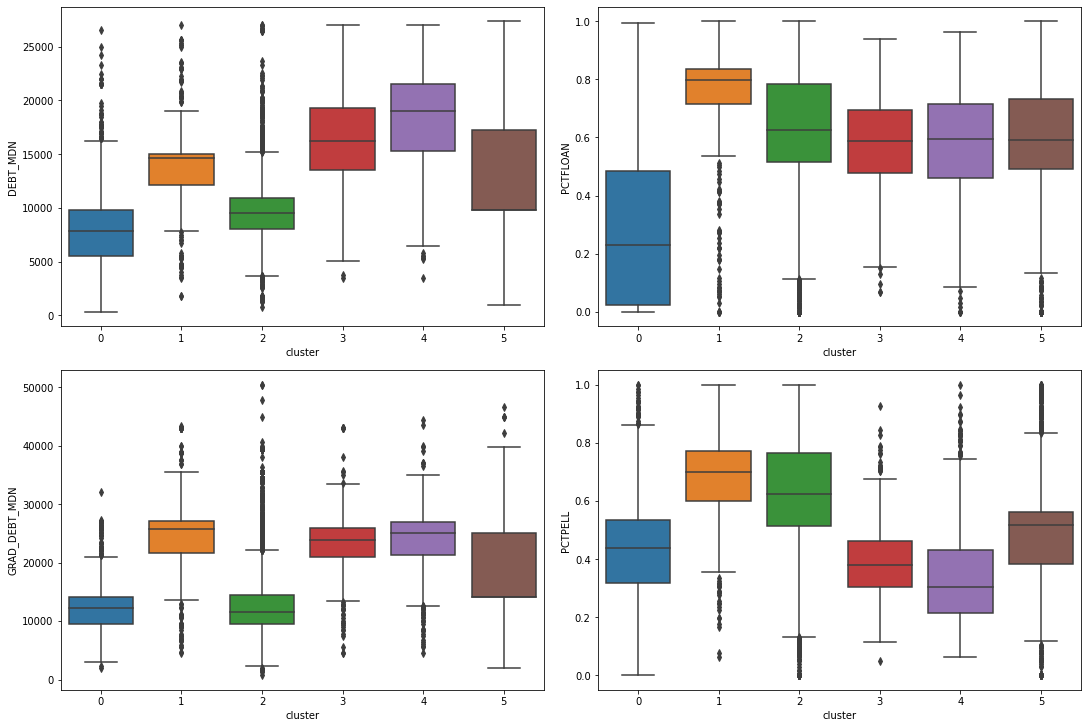

In [ ]:
continuas = ['DEBT_MDN', 'PCTFLOAN', 'GRAD_DEBT_MDN', 'PCTPELL']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout = True)

for ax, col in zip(fig.axes, continuas):
  sns.boxplot(x=df[df['cluster'].isin(range(6))]['cluster'], y=df[col], ax=ax)

En el gráfico anterior se mostraron las diferentes variables continuas (deuda media, deuda media de graduados, procentaje de estudiantes que recibieron préstamo federal y porcentaje de estudiantes con beca Pell Grants) contra cada uno de los clusters, donde se puede notar que:



*   Los clusters 3 y 4 es donde hay un mayor cantidad de universidades cuyos estudiantes tienen una deuda de endeudamiento media alto, con respecto a los estudiantes de las otros grupos de universidades. Por otro lado, los clusters 0 y 2 contienen a las universidades cuyos estudiantes tienen menor deuda media.
*   El cluster 0 es el que las universidades tienen un porcentaje menor de estudiantes con préstamos federal con respecto a los otros clusters. Sin embargo, el porcentaje de estudiantes con préstamo federal es muy variable, ya que presenta una mayor dispersión. Para los otros clusters no se ve una diferencia visual significativa entre el procentaje de estudiantes con préstamo.
*   Los clusters 1 y 2 son los que contienen las universidades con mayor porcentaje de estudiantes con beca Pell Grants con respecto a los demás clusters.



Text(0.5, 1.0, 'CONTROL')

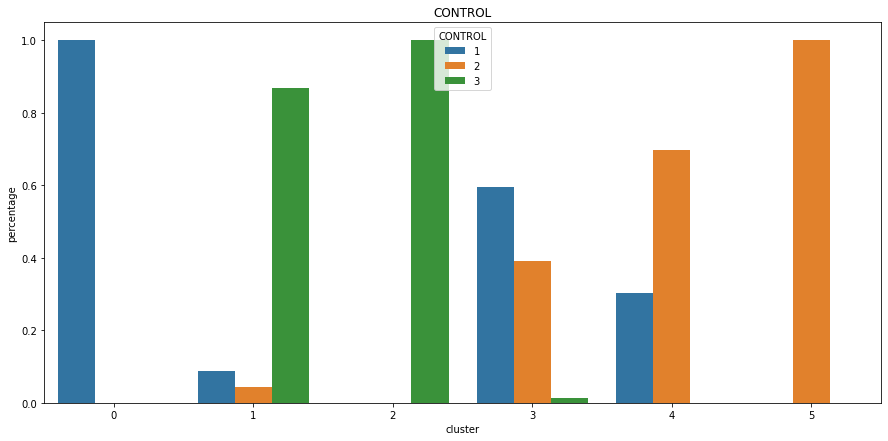

In [ ]:
# variable usada para encontrar los porcentajes
tamanos = {clust: len(df[df['cluster'] == clust]) for clust in range(6)}

# definición de gráfica
fig, ax = plt.subplots(figsize=(15, 7))

data = df.groupby(['cluster', 'CONTROL'], as_index=False).agg({'CURROPER': 'count'}).rename({'CURROPER': 'cantidad'}, axis=1)
data['percentage'] = data['cantidad'] / data['cluster'].map(tamanos)

sns.barplot(data=data[data['cluster'].isin(range(6))], y="percentage", x="cluster",  hue="CONTROL", ax=ax)
ax.set_title('CONTROL')

En el gráfico anterior se mostró el porcentaje de cada tipo de universidad dentro de cada cluster. Siendo 1 universidad pública, 2 universidad privada sin ánimo de lucro y 3 universidad privada con ánimo de lucro. Se puede observar que:


*   El cluster 0 se compone únicamente de universidades públicas.
*   El cluster 1 se compone en su mayoría de universidades privadas con ánimo de lucro, sin embargo también contiene algunas sin ánimo de lucro y públicas en menor medida.
*   El cluster 2 se compone únicamente de universidades privadas con ánimo de lucro.
*   El cluster 3 tiene en su mayoría universidades públicas y privadas sin ánimo de lucro.
*   El cluster 4 tiene en mayor parte universidades universidades privadas sin ánimo de lucro y no tiene privadas con ánimo de lucro.
*   El cluster 5 se compone únicamente de universidades sin ánimo de lucro.

In [ ]:
pcip = ['PCIP11', 'PCIP15', 'PCIP14', 'PCIP27']
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
data = df.groupby('cluster').mean()[['PCIP11', 'PCIP15', 'PCIP14', 'PCIP27']].reset_index()


In [ ]:
df.groupby('cluster').mean().reset_index()

,cluster,CURROPER,CONTROL,DEBT_MDN,PCTFLOAN,GRAD_DEBT_MDN,PCIP11,PCIP15,PCIP14,PCIP27,CIP11BACHL,CIP15BACHL,CIP14BACHL,CIP27BACHL,PCTPELL,clusters
0,0,0.986019,1.000000,8152.711718,0.278758,12251.161451,0.024345,0.028628,0.003667,0.001118,0.027963,0.013316,0.014647,0.019973,0.442093,2.964714
1,1,0.969697,2.780303,13979.606061,0.719444,24729.108586,0.187903,0.116473,0.006149,0.000000,1.065657,0.727273,0.073232,0.000000,0.666836,0.000000
2,2,0.914975,3.000000,9936.592969,0.607537,14060.324213,0.016314,0.010275,0.000130,0.000006,0.099441,0.002648,0.004119,0.000588,0.618884,1.897029
3,3,1.000000,1.416520,16249.321617,0.581018,23194.485062,0.027859,0.016964,0.025422,0.008349,1.968366,1.015817,1.012302,1.796134,0.391032,0.887522
4,4,0.998464,1.697389,18296.430108,0.577565,23648.472350,0.021180,0.005923,0.042813,0.017416,0.975422,0.215054,0.448541,0.990783,0.343293,0.086022
5,5,0.968529,2.000000,13141.130212,0.553936,18335.863100,0.009757,0.005699,0.003505,0.001319,0.121164,0.008655,0.009441,0.117231,0.495329,3.612903


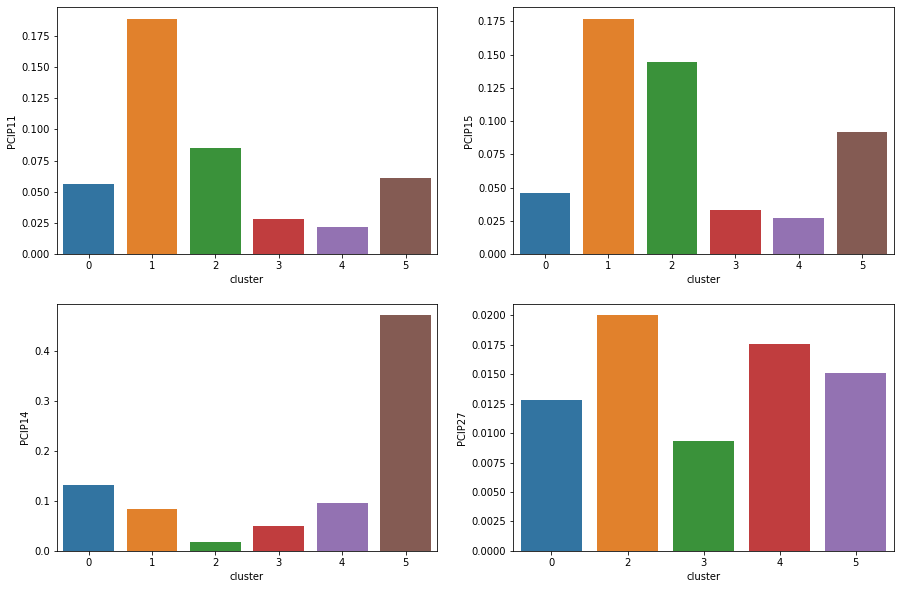

In [ ]:
pcip = ['PCIP11', 'PCIP15', 'PCIP14', 'PCIP27']
['CIP11BACHL', 'CIP14BACHL', 'CIP15BACHL', 'CIP27BACHL']
map_pcip = {
    'PCIP11': 'CIP11BACHL',
    'PCIP14': 'CIP14BACHL',
    'PCIP15': 'CIP15BACHL',
    'PCIP27': 'CIP27BACHL',   
}

fig, ax = plt.subplots(2, 2, figsize=(15, 10))


for col, ax in zip(pcip, fig.axes):
  data = df[df[map_pcip[col]] != 0]
  data = data.groupby('cluster').mean().reset_index()
  

  sns.barplot(data=data[['cluster', col]],
                x='cluster',
                y=col,
                ax=ax)

Las gráficas anteriores muestran el porcentaje de estudiantes graduados por carrera en cada universidad. Donde PCIP11 corresponde a los títulos otorgados en el campo de la computación, PCIP14 en el campo de la ingeniería, PCIP15 en el campo de la ingeniería y tecnología y PCIP27 en el campo de las matemáticas.
De las gráficas se puede ver que:


*   El cluster 1 está compuesto por universidades con mayor porcentaje de titulos otorgados en los campos de computación e ingeniería y tecnología con respecto a los demas clusters.
*   En general las universidades con mas títulos otorgados en computación e ingeniería y tecnología se encuentran en los clusters 1, 2 y 5 en ese orden de mayor a menor.
*   El cluster 5 es donde, con gran diferencia, están las universidades con mayor porcentaje de títulos en ingeniería otorgados.
*   Respecto al campo de las matemáticas es notable que todos los clusters tienen universidades con titulos otorgados en este campo, salvo el cluster 1 y siendo el cluster 2 el de mayor porcentaje de títulos entregados.

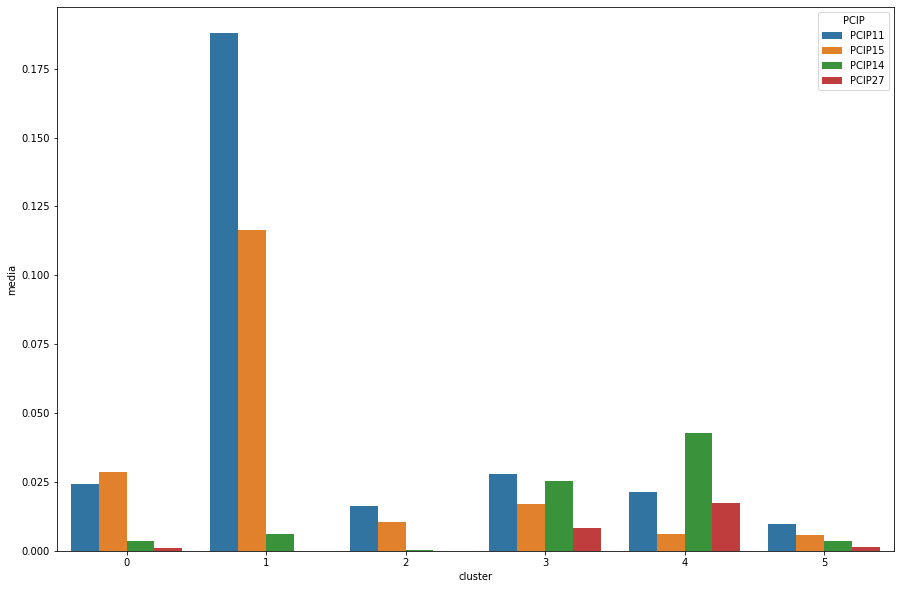

In [ ]:
pcip = ['PCIP11', 'PCIP15', 'PCIP14', 'PCIP27']
fig, ax = plt.subplots(figsize=(15, 10))

data = df.groupby('cluster').mean()[['PCIP11', 'PCIP15', 'PCIP14', 'PCIP27']].stack().to_frame().reset_index()
data.rename({'level_1': 'PCIP', 0: 'media'}, axis=1, inplace=True)
sns.barplot(data=data,
              x='cluster',
              y='media',
              hue='PCIP',
            ax=ax)

## Buscando diferencias en el grupo que la mayoría no ofertan las carreras, los grupos: 0, 2, y 5  
FALTA SACAR LAS MEDIAS DE LOS PCI


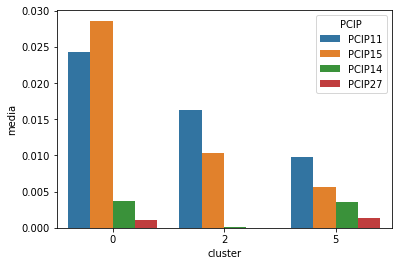

In [ ]:
pcip = ['PCIP11', 'PCIP15', 'PCIP14', 'PCIP27']
df_presencial = df[df['cluster'].isin([0, 2, 5])]
data = df_presencial.groupby('cluster').mean()[['PCIP11', 'PCIP15', 'PCIP14', 'PCIP27']].stack().to_frame().reset_index()
data.rename({'level_1': 'PCIP', 0: 'media'}, axis=1, inplace=True)
sns.barplot(data=data,
              x='cluster',
              y='media',
              hue='PCIP')

Comparando los clusters de mayor similitud en los que la mayoría de universidades no ofertan las carreras de interés tenemos que, de las universidades que los ofertan se puede ver que:

*   En el campo de la computación es donde más títulos se otorgan en comparación a los otros campos.
*   El cluster 0 (en el menos se ofertan los campos de interés) es donde se presenta la mayor cantidad de graduados en los pregrados de computación e ingeniería y tecnología.
*   El cluster 2 es el de menor media de gradudados en matemáticas en comparación con el cluster 0 y 5.
*   El cluster 5 es donde se presenta menor cantidad de graduados en computación e ingeniería en comparación a los clusters 0 y 2.

### comparando DEBT_MDN, PCTFLOAN, GRAD_DEBT_MDN y PCTPELL

El siguiente gráfico se observa las las diferencias visaules que tienen las variables: deuda media acumulada de los estudiates que terminarón la carrera (DEBT_MDN),deuda media acumulada de los estudiates que no terminarón la carrera (GRAN_DEBT_MDN), porcentaje de estudiantes que ganaron la beca PELL y tasa de endeudamiento de los estudiantes de la institución (PCTFLOAN).

En la parte superior derecha se visualiza una diferencia que existe entre el cluster 0 respecto al 2 y 3, para la tasa de endeudamiento, además, se puede notar que entre el cluster 1 y 2 no se evidencia una diferencia significativa visual, por lo que se asume que tiene caracteristicas muy similares.

Para la variable que representa el porcentaje  de estudiantes que ganarón la beca se ve una diferencia en cluster 2, respecto al 0 y el 5, ademas la dispersión de los datos en este grupo es muy baja, por lo qye informa que es un grupo homogeneo 


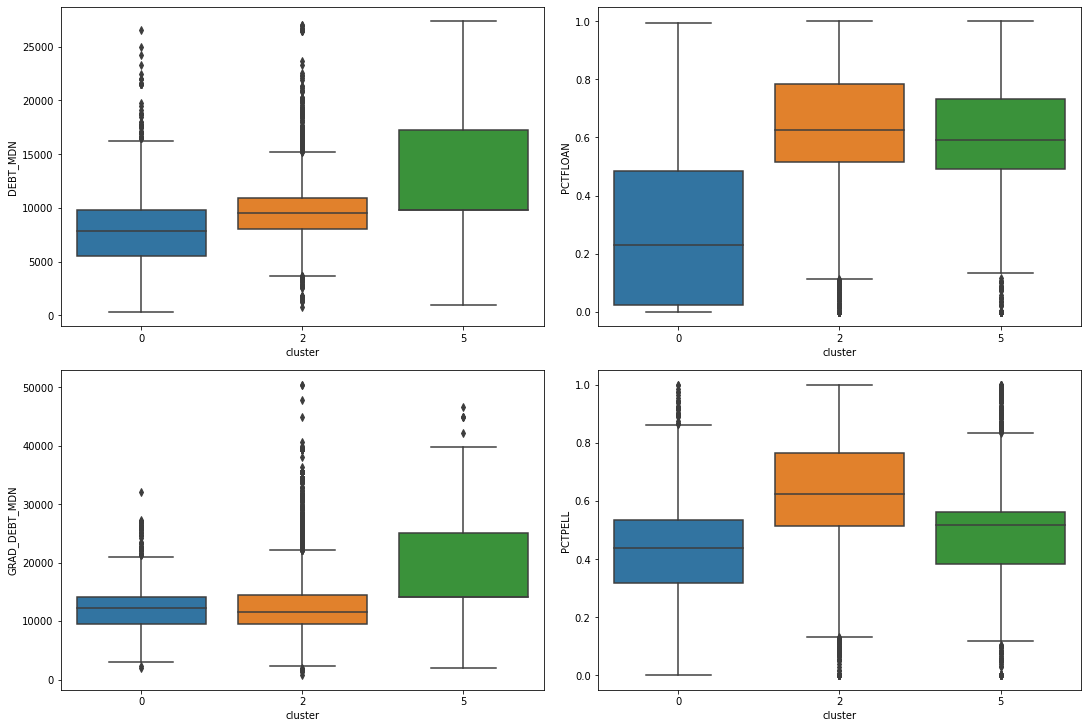

In [ ]:
continuas = ['DEBT_MDN', 'PCTFLOAN', 'GRAD_DEBT_MDN', 'PCTPELL']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout = True)

for ax, col in zip(fig.axes, continuas):
  sns.boxplot(x=df_presencial['cluster'], y=df[col], ax=ax)

### comparando Control y Curroper

Text(0.5, 1.0, 'CURROPER')

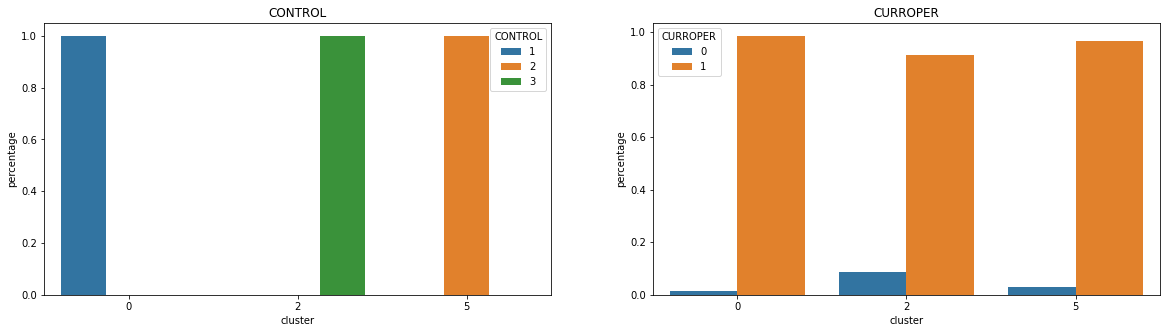

In [ ]:
# variable usada para encontrar los porcentajes
tamanos = {clust: len(df[df['cluster'] == clust]) for clust in range(6)}

# definición de gráfica
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

data = df.groupby(['cluster', 'CONTROL'], as_index=False).agg({'CURROPER': 'count'}).rename({'CURROPER': 'cantidad'}, axis=1)
data['percentage'] = data['cantidad'] / data['cluster'].map(tamanos)

sns.barplot(data=data[data['cluster'].isin([0, 2, 5])], y="percentage", x="cluster",  hue="CONTROL", ax=ax[0])
ax[0].set_title('CONTROL')

data = df.groupby(['cluster', 'CURROPER'], as_index=False).agg({'CONTROL': 'count'}).rename({'CONTROL': 'cantidad'}, axis=1)
data['percentage'] = data['cantidad'] / data['cluster'].map(tamanos)

sns.barplot(data=data[data['cluster'].isin([0, 2, 5])], y="percentage", x='cluster',  hue='CURROPER', ax=ax[1])
ax[1].set_title('CURROPER')

Entre los clusters 0, 2 y 5 (los de mayor similitud en cuanto a que la mayoría de sus universidades no oferta los campos de interés) es notable que todas las universidades del cluster 0 son públicas, las del cluster 3 privadas sin ánimo de lucro y las del cluster 2 privadas con ánimo de lucro.

Además es notable que la mayoría de universidades de estos clusters están operativas, siendo el cluster 0 el de mayor cantidad de universidades operativas.

#Caracterización de clusters



*   **Cluster 0:** Compuesto por universidades públicas, en donde está el menor porcentaje de estudiantes con un préstamo federal y por tanto la menor deuda media. Sin embargo es el cluster que contiene las universidades con menor oferta de las carreras de interés, por ende es donde menor cantidad de estudiantes graduados en dichos pregrados hay.
*   **Cluster 1:** Compuesto por universidades en su mayoría privadas con ánimo de lucros y poseen un mayor porcentaje de estudiantes tanto con préstamo federal como con beca Pell Grants, debido a esto sus estudiantes tienen una deuda media mayor que los clusters 0 y 2 y es el de mayor deuda media de sus estudiantes graduados (junto con los clusters 3 y 4). En este cluster es donde se encuentran las universidades con mas oferta presencial de los campos de computación e ingeniería y tecnología, además es donde mayor porcentaje de estudiantes graduados en computación, ingeniería y tecnología y matemáticas hay.
*   **Cluster 2:** Compuesto únicamente por universidades privadas con ánimo de lucro similar al cluster 0 contiene las universidas con menor oferta de las carreras y menor deuda media de sus estudiantes, pero tiene una mayor oferta que el cluster 0 de computación en la modalidad virtual. Tiene un porcentaje de estudiantes con préstamo federal muy similar a los clusters 3, 4 y 5 y es el segundo en cuanto a estudiantes con beca Pell Grants. Respecto a los graduados, es el de menor porcentaje de estos en las carreras salvo en computación y en ingeniería y tecnología que es el segundo mayor.
*   **Cluster 3:** Compuesto en su mayoría por universidades públicas y privadas sin ánimo de lucro las cuales no ofertan las carreras de forma presencial, únicamente virtual. A pesar de que tiene un porcentaje similar a los clusters 2, 4 y 5 de estudiantes con préstamos federales, es el cluster con universidades cuyos estudiantes tienen la segunda mayor deuda media esto quizá provocado porque también tiene el segundo menor porcentaje de estudiantes con beca Pell Grants. Sus universidades son las de menor porcentaje de graduados (junto con el cluster  4) salvo en mátemáticas que tiene el segundo mayor porcentaje de graduados en este campo.
*   **Cluster 4:** Compuesto únicamente por universidades públicas y privadas sin ánimo de lucro (siendo mayor la cantidad de éstas ultimas en el cluster) las cuales ofertan las carreras únicamente de forma presencial. Como en el cluster 3 tiene un porcentaje similar de estudiantes con préstamos federales a los clusters 2 y 5, pero es el cluster con universidades cuyos estudiantes tienen la mayor deuda media, ocasionado probablemente también porque es el de menor porcentaje de estudiantes con beca Pell Grants. Respecto al porcentaje de universidades graduados en sus universidades, ocurre aproximadamente lo mismo que en el cluster 3.
*   **Cluster 5:** Compuesto únicamente por universidades privadas sin ánimo de lucro, las universidades dentro de este grupo son similares en cuanto a su no oferta de las carreras como los clusters 0 y 2, sin embargo tienen un poco más de oferta en los campos de computación y matemáticas en las modalidades presencial y virtual que estos 2 clusters anteriormente mencionados. Su deuda media y porcentaje de estudiantes con préstamo federal son similares a los de cluster 1 y 4 respectivamente y es el tercero en cuanto a mayor media de porcentaje de estudiantes con becas Pell Grants. Destaca en que es el cluaster con mayor porcentaje de graduados en ingeniería y en general es el tercero con mayor porcentaje de estudiantes graduados para las demás carreras.



## Las otras dos 3 y 4

### Comparando 'DEBT_MDN', 'PCTFLOAN', 'GRAD_DEBT_MDN', 'PCTPELL'

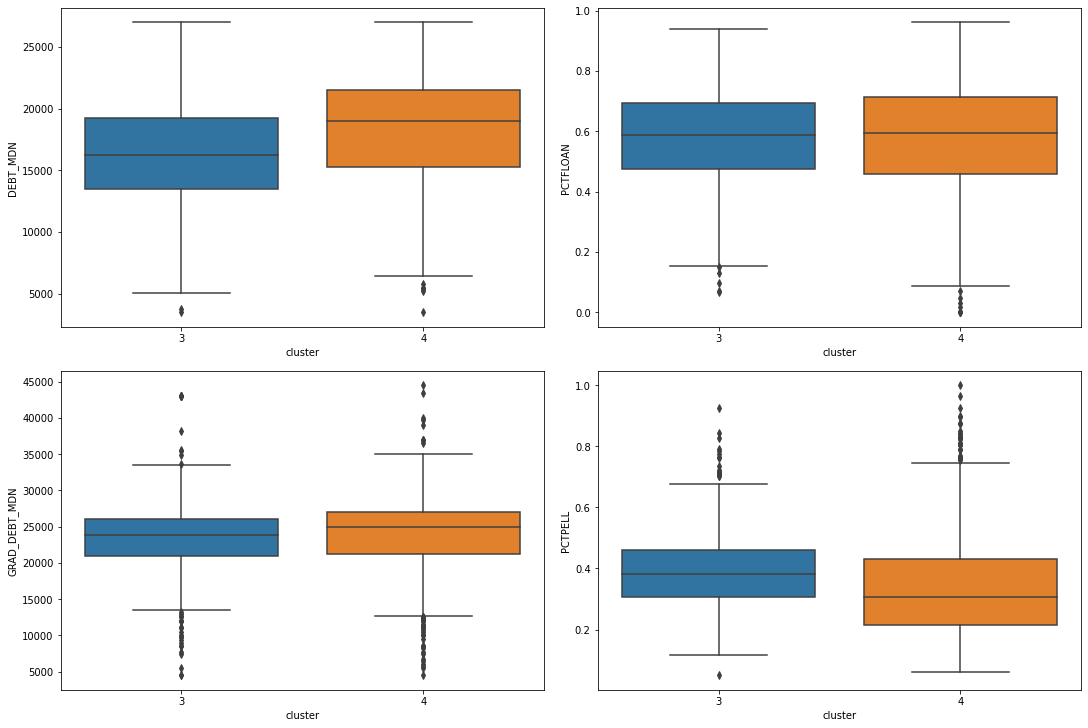

In [ ]:
continuas = ['DEBT_MDN', 'PCTFLOAN', 'GRAD_DEBT_MDN', 'PCTPELL']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout = True)

for ax, col in zip(fig.axes, continuas):
  sns.boxplot(x=df[df['cluster'].isin([3, 4])]['cluster'], y=df[col], ax=ax)

### Comparando Control y Curroper

> Bloque con sangría



Text(0.5, 1.0, 'CURROPER')

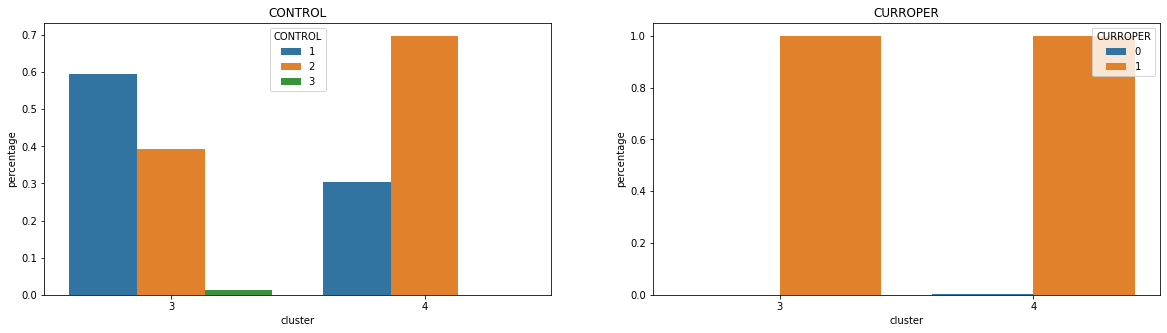

In [ ]:
# variable usada para encontrar los porcentajes
tamanos = {clust: len(df[df['cluster'] == clust]) for clust in range(6)}

# definición de gráfica
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

data = df.groupby(['cluster', 'CONTROL'], as_index=False).agg({'CURROPER': 'count'}).rename({'CURROPER': 'cantidad'}, axis=1)
data['percentage'] = data['cantidad'] / data['cluster'].map(tamanos)

sns.barplot(data=data[data['cluster'].isin([3, 4])], y="percentage", x="cluster",  hue="CONTROL", ax=ax[0])
ax[0].set_title('CONTROL')

data = df.groupby(['cluster', 'CURROPER'], as_index=False).agg({'CONTROL': 'count'}).rename({'CONTROL': 'cantidad'}, axis=1)
data['percentage'] = data['cantidad'] / data['cluster'].map(tamanos)

sns.barplot(data=data[data['cluster'].isin([3, 4])], y="percentage", x='cluster',  hue='CURROPER', ax=ax[1])
ax[1].set_title('CURROPER')

#Comparación intra-cluster

###Cluster 0

In [ ]:
continuas = ['DEBT_MDN', 'PCTFLOAN', 'GRAD_DEBT_MDN', 'PCTPELL']

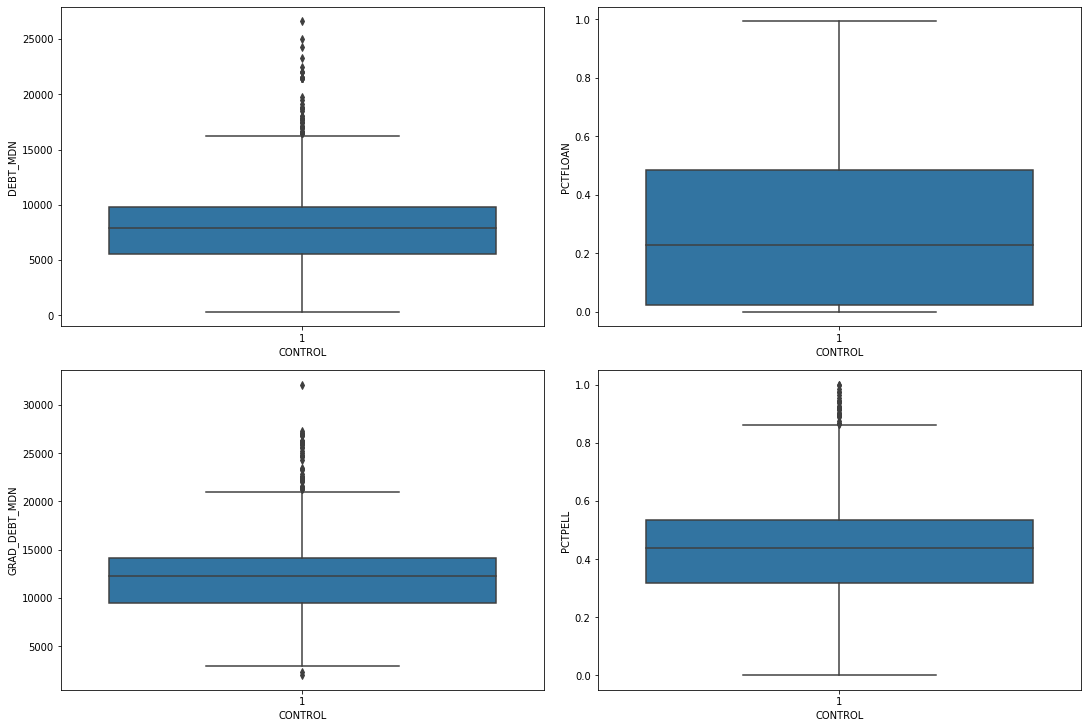

In [ ]:
#fig, ax = plt.subplots(, 2, figsize=(20, 5))
df_clust = df[df['cluster'] == 0]

fig, ax = plt.subplots(2, 2, figsize=(15, 10), constrained_layout = True)
for ax, col in zip(fig.axes, continuas):
  sns.boxplot(x=df_clust["CONTROL"], y=df_clust[col], ax=ax)

###Cluster 1

Text(0.5, 0, 'Modalidad')

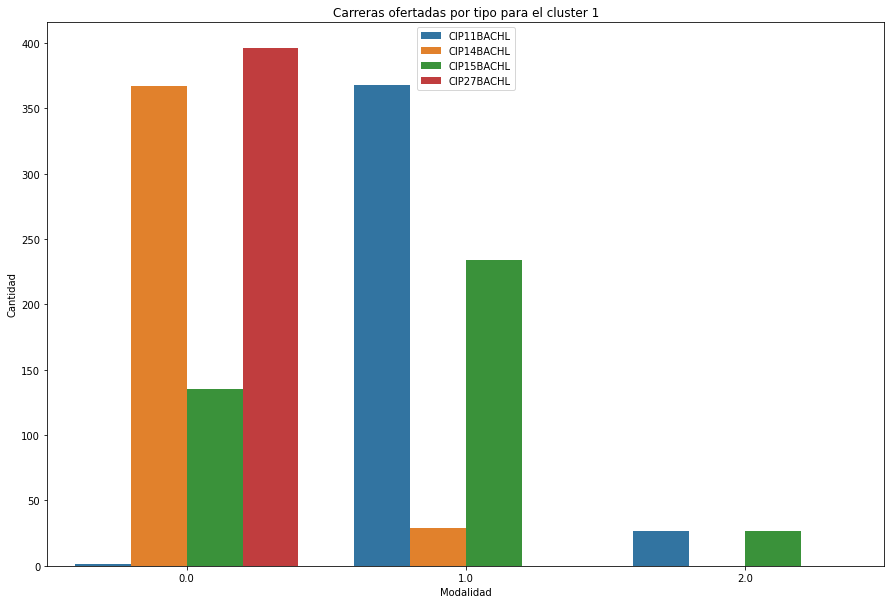

In [ ]:
cols_to_graph = ['CIP11BACHL', 'CIP14BACHL', 'CIP15BACHL', 'CIP27BACHL']
fig, axs = plt.subplots(figsize=(15, 10))

datos = {'tipo': [], 'carrera': [], 'cantidad': []}
df_clust = df[df['cluster'] == 1]
# TODO: Nombre de gráfica y labels
for col in cols_to_graph:
    for key, value in df_clust[col].value_counts().to_dict().items():
        datos['tipo'].append(key)
        datos['carrera'].append(col)
        datos['cantidad'].append(value)

sns.barplot(data=datos,
            x='tipo',
            y='cantidad',
            hue='carrera',
            ax=axs)
axs.set_title('Carreras ofertadas por tipo para el cluster 1')
axs.set_ylabel('Cantidad')
axs.set_xlabel('Modalidad')

Text(0.5, 1.0, 'Cantidad de universidades por tipo de institución para el cluster 1')

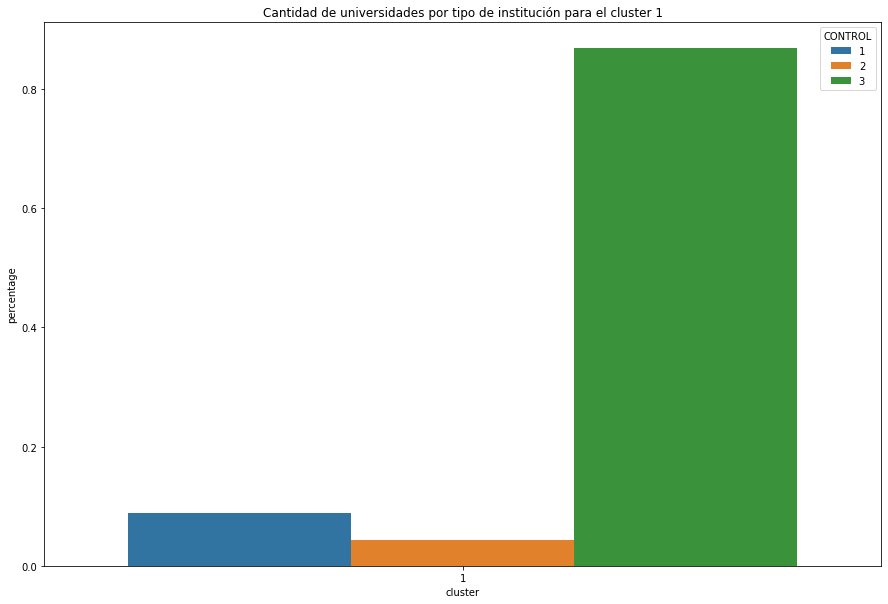

In [ ]:
tamanos = {clust: len(df[df['cluster'] == clust]) for clust in range(6)}

# definición de gráfica
fig, ax = plt.subplots(figsize=(15, 10))

data = df.groupby(['cluster', 'CONTROL'], as_index=False).agg({'CURROPER': 'count'}).rename({'CURROPER': 'cantidad'}, axis=1)
data['percentage'] = data['cantidad'] / data['cluster'].map(tamanos)

sns.barplot(data=data[data['cluster'].isin([1])], y="percentage", x="cluster",  hue="CONTROL", ax=ax)

ax.set_title('Cantidad de universidades por tipo de institución para el cluster 1')

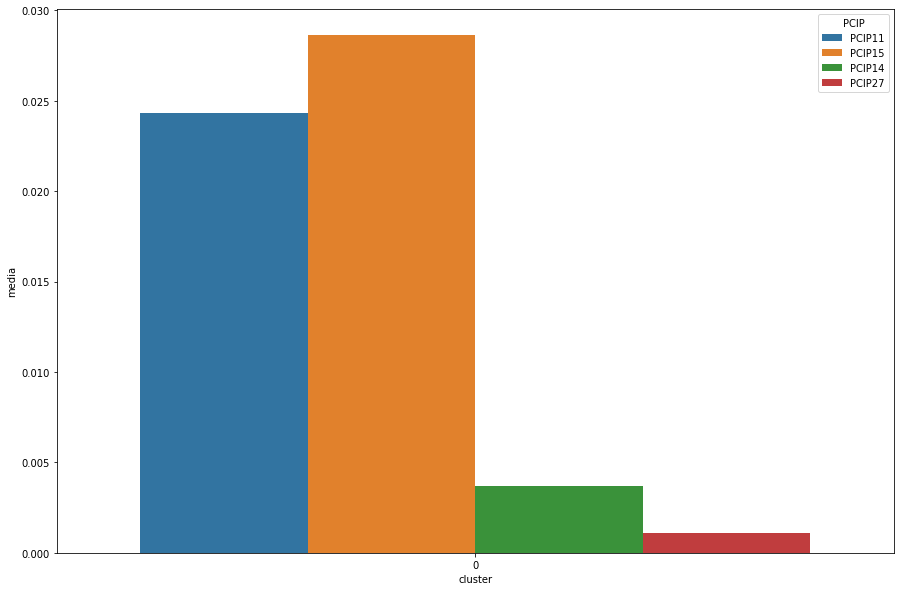

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
pcip = ['PCIP11', 'PCIP15', 'PCIP14', 'PCIP27']
df_presencial = df[df['cluster'].isin([0])]
data = df_presencial.groupby('cluster').mean()[['PCIP11', 'PCIP15', 'PCIP14', 'PCIP27']].stack().to_frame().reset_index()
data.rename({'level_1': 'PCIP', 0: 'media'}, axis=1, inplace=True)
sns.barplot(data=data,
              x='cluster',
              y='media',
              hue='PCIP',
              ax=ax)

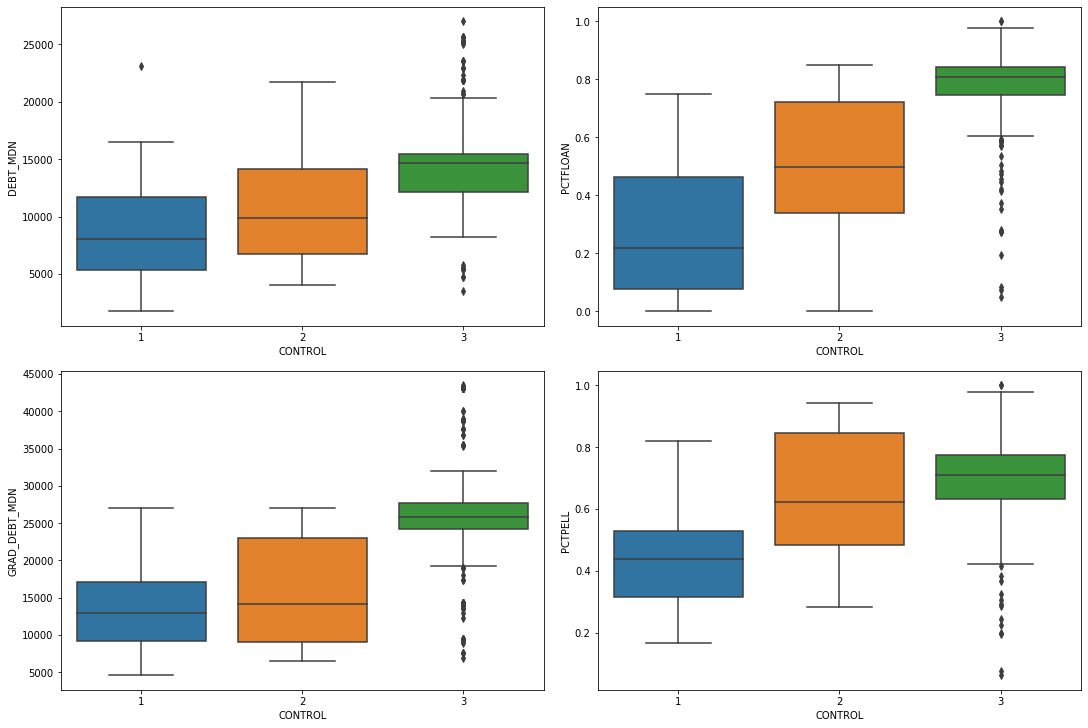

In [ ]:
#fig, ax = plt.subplots(, 2, figsize=(20, 5))
df_clust = df[df['cluster'] == 1]

fig, ax = plt.subplots(2, 2, figsize=(15, 10), constrained_layout = True)
for ax, col in zip(fig.axes, continuas):
  sns.boxplot(x=df_clust["CONTROL"], y=df_clust[col], ax=ax)

###Cluster 2

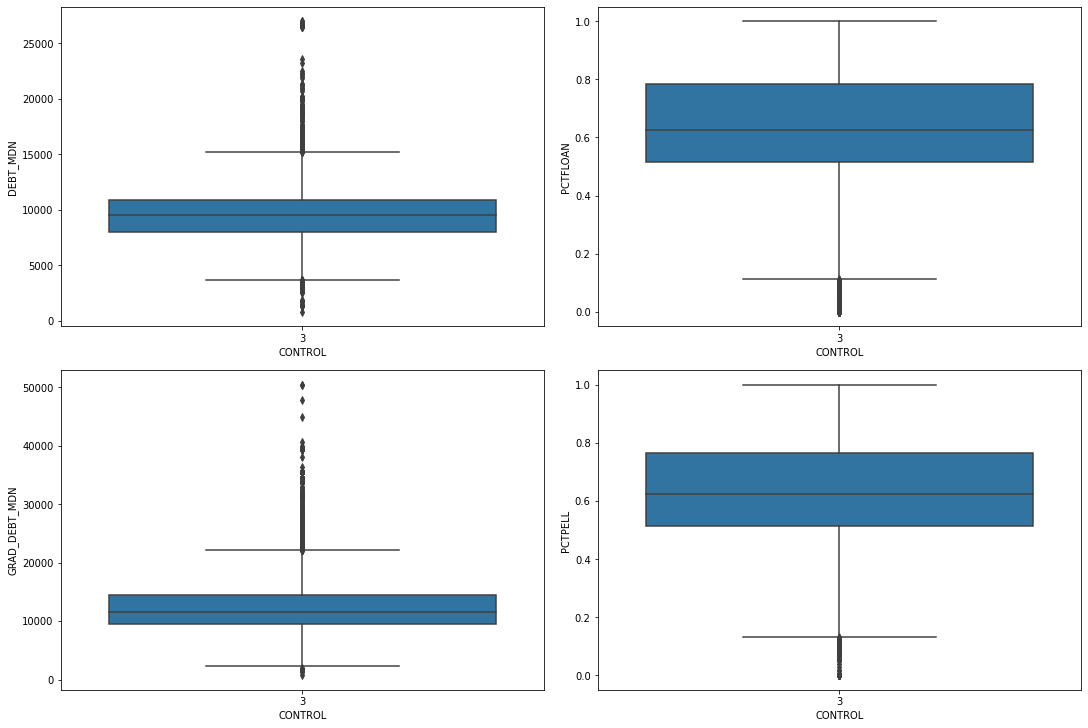

In [ ]:
#fig, ax = plt.subplots(, 2, figsize=(20, 5))
df_clust = df[df['cluster'] == 2]

fig, ax = plt.subplots(2, 2, figsize=(15, 10), constrained_layout = True)
for ax, col in zip(fig.axes, continuas):
  sns.boxplot(x=df_clust["CONTROL"], y=df_clust[col], ax=ax)

###Cluster 3

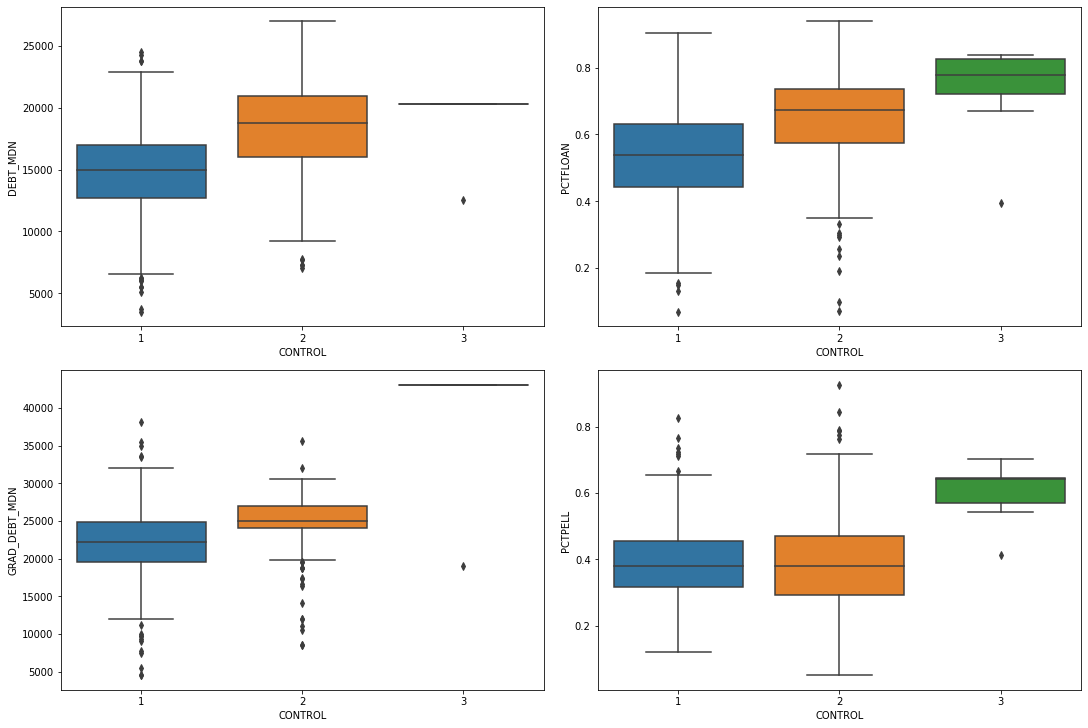

In [ ]:
#fig, ax = plt.subplots(, 2, figsize=(20, 5))
df_clust = df[df['cluster'] == 3]

fig, ax = plt.subplots(2, 2, figsize=(15, 10), constrained_layout = True)
for ax, col in zip(fig.axes, continuas):
  sns.boxplot(x=df_clust["CONTROL"], y=df_clust[col], ax=ax)

###Cluster 4

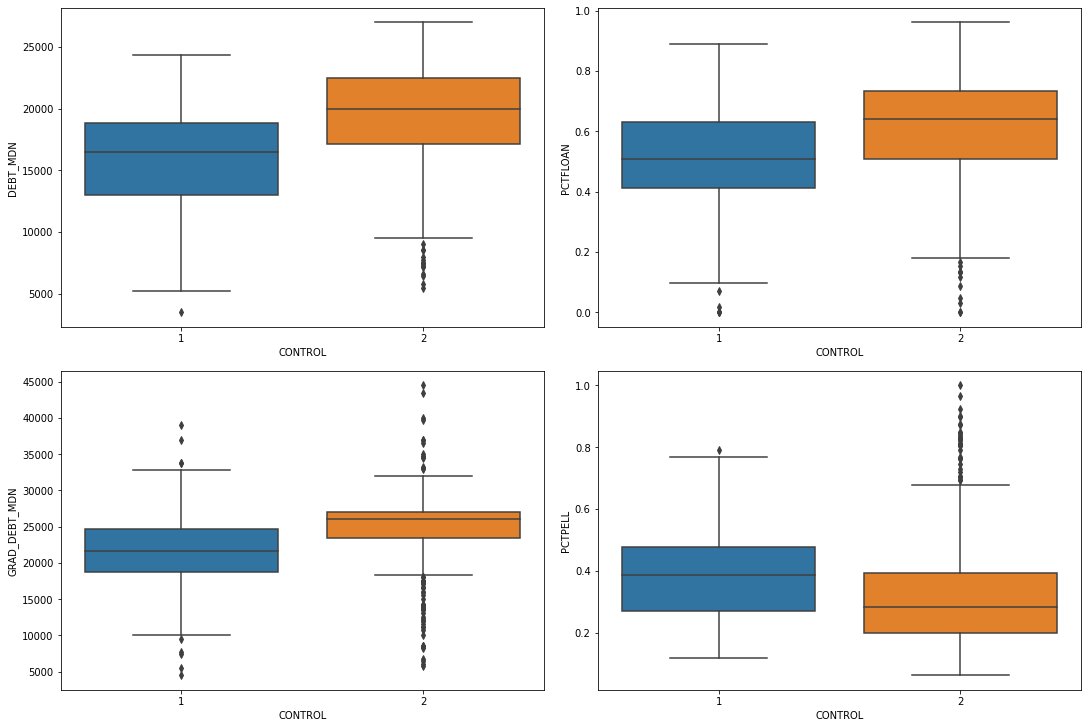

In [ ]:
#fig, ax = plt.subplots(, 2, figsize=(20, 5))
df_clust = df[df['cluster'] == 4]

fig, ax = plt.subplots(2, 2, figsize=(15, 10), constrained_layout = True)
for ax, col in zip(fig.axes, continuas):
  sns.boxplot(x=df_clust["CONTROL"], y=df_clust[col], ax=ax)

###Cluster 5

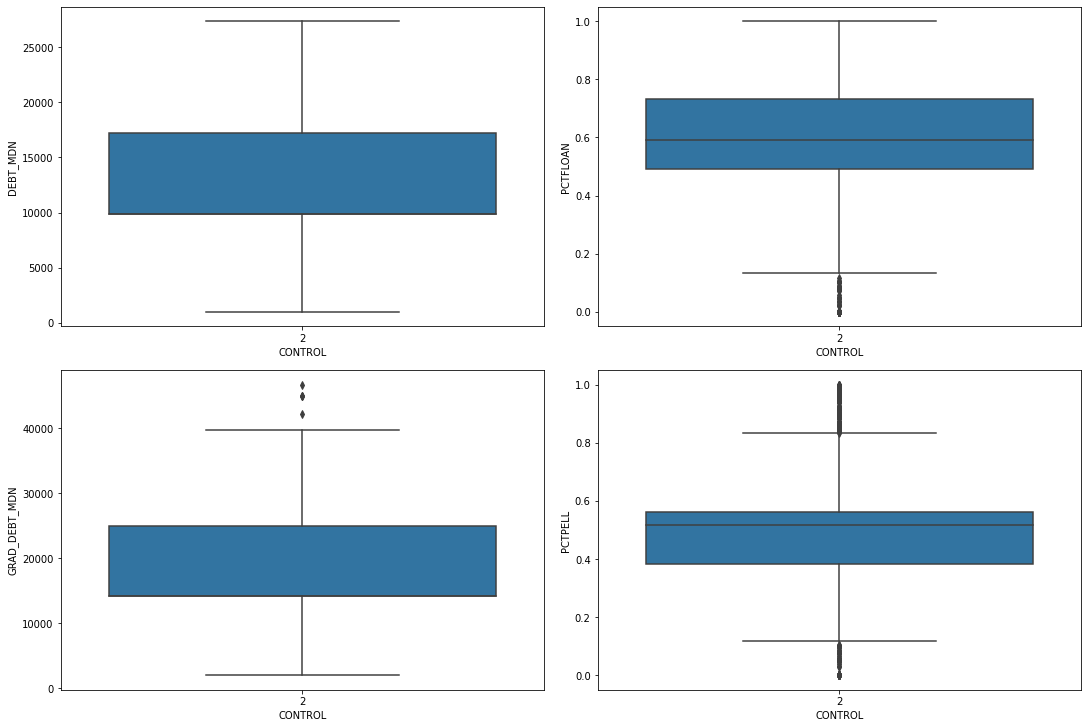

In [ ]:
#fig, ax = plt.subplots(, 2, figsize=(20, 5))
df_clust = df[df['cluster'] == 5]

fig, ax = plt.subplots(2, 2, figsize=(15, 10), constrained_layout = True)
for ax, col in zip(fig.axes, continuas):
  sns.boxplot(x=df_clust["CONTROL"], y=df_clust[col], ax=ax)